# Exploratory analysis of the wine tasting dataset
Itis important to know the structure of the data before doing any ML.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df_wine = pd.read_csv('data/winedata.csv', index_col='index')
df_wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
df_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
points,129971.0,88.447138,3.039730,80.0,86.0,88.0,91.0,100.0
price,120975.0,35.363389,41.022218,4.0,17.0,25.0,42.0,3300.0


In [5]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [6]:
top_variety = df_wine['variety'].value_counts()
top_variety.head(20)

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Riesling                     5189
Sauvignon Blanc              4967
Syrah                        4142
Rosé                         3564
Merlot                       3102
Nebbiolo                     2804
Zinfandel                    2714
Sangiovese                   2707
Malbec                       2652
Portuguese Red               2466
White Blend                  2360
Sparkling Blend              2153
Tempranillo                  1810
Rhône-style Red Blend        1471
Pinot Gris                   1455
Name: variety, dtype: int64

In [8]:
#keep only the top 20 varieties
df_wine = df_wine[df_wine['variety'].isin(top_variety.index[:20])]

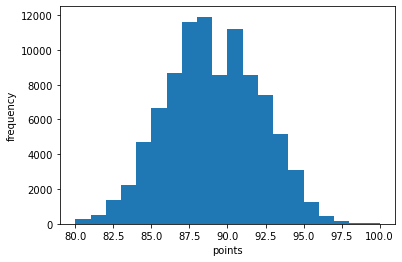

In [9]:
#plot the distribution of the points
plt.hist(df_wine['points'],bins=20)
plt.xlabel('points')
plt.ylabel('frequency')
plt.show()

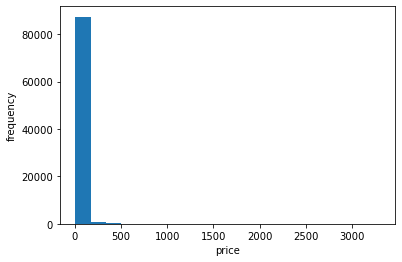

In [10]:
#plot the distribution of the price
plt.hist(df_wine['price'],bins=20)
plt.xlabel('price')
plt.ylabel('frequency')
plt.show()

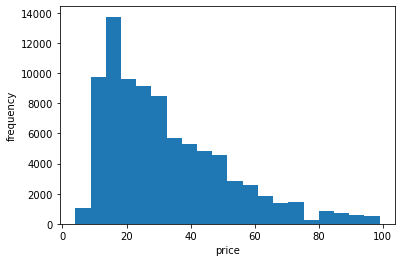

In [11]:
#take only the prices under $100
df_wine = df_wine[df_wine['price']<100]
plt.hist(df_wine['price'],bins=20)
plt.xlabel('price')
plt.ylabel('frequency')
plt.show()

In [12]:
df_wine['country'].value_counts()

US                44673
France            11928
Italy              8611
Chile              3489
Spain              3263
Argentina          2988
Portugal           2518
Germany            1774
New Zealand        1334
Australia          1191
Austria             984
South Africa        825
Israel              369
Greece              188
Canada              174
Bulgaria            114
Romania              87
England              69
Mexico               51
Slovenia             46
Hungary              45
Moldova              39
Uruguay              38
Turkey               37
Lebanon              33
Brazil               28
Morocco              23
Georgia              17
Croatia              14
Ukraine              12
Peru                 12
Cyprus                8
Serbia                6
Macedonia             6
Luxembourg            5
Czech Republic        5
India                 2
Switzerland           2
Slovakia              1
Armenia               1
Name: country, dtype: int64

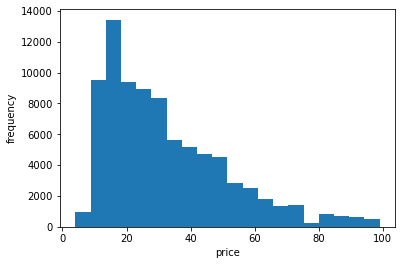

In [13]:
#keep countries with more than 500 wines
df_wine = df_wine[df_wine['country'].isin(df_wine['country'].value_counts()[df_wine['country'].value_counts()>500].index)]

plt.hist(df_wine['price'],bins=20)
plt.xlabel('price')
plt.ylabel('frequency')
plt.show()

In [14]:
#Extract the year from the title column
df_wine['year'] = df_wine['title'].str.extract('(\d{4})',expand=False)
df_wine.dropna(subset=['year'],inplace=True)
df_wine['year'] = df_wine['year'].astype(int)

#keep only the years between 1970 and 2022
df_wine = df_wine[df_wine['year']>1970]
df_wine = df_wine[df_wine['year']<2022]

df_wine['year'].describe()

count    81477.000000
mean      2010.732759
std          3.544242
min       1985.000000
25%       2009.000000
50%       2011.000000
75%       2013.000000
max       2017.000000
Name: year, dtype: float64

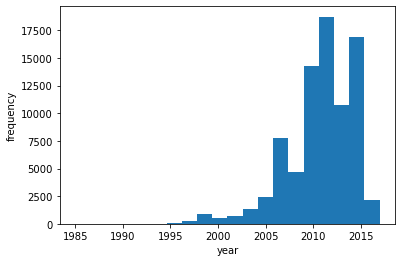

In [15]:
#plot the distribution of the year
plt.hist(df_wine['year'],bins=20)
plt.xlabel('year')
plt.ylabel('frequency')
plt.show()

<AxesSubplot:>

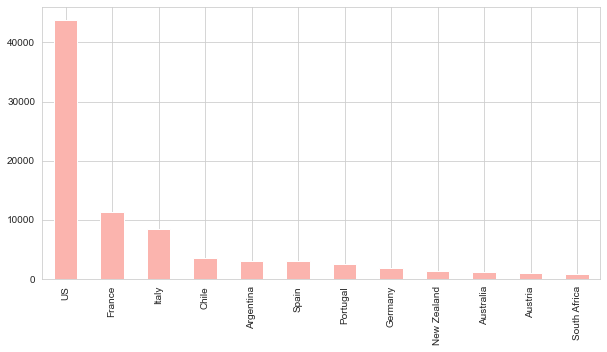

In [377]:
#count the number of wines per country
df_country = df_wine['country'].value_counts()
df_country.plot(kind='bar',figsize=(10,5),cmap='Pastel1')